<a href="https://colab.research.google.com/github/PozzOver13/learning/blob/main/20231110_tutorial_polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polars Tutorial 🐻




## Usefull Links
https://realpython.com/polars-python/  
https://www.pola.rs/

## What is Polars?

## What is Rust?

## Why it is worth to know it?

**Philosophy**  
The goal of Polars is to provide a lightning fast DataFrame library that:



1.   Utilizes all available cores on your machine.
1.   Optimizes queries to reduce unneeded work/memory allocations.
1.   Handles datasets much larger than your available RAM.
1.   Has an API that is consistent and predictable.
1. Has a strict schema (data-types should be known before running the query).
1. Polars is written in Rust which gives it C/C++ performance and allows it to fully control performance critical parts in a query engine.

As such Polars goes to great lengths to:

1. Reduce redundant copies.
1. Traverse memory cache efficiently.
1. Minimize contention in parallelism.
1. Process data in chunks.
1. Reuse memory allocations.


In [ ]:
!python --version

Python 3.10.12


# Pandas vs Polars

## Importing libraries

In [1]:
import pandas as pd
import polars as pl
import numpy as np

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
TRAIN_CSV_PATH = "/content/drive/MyDrive/Personale/Dataset/finance_loan_approval/train.csv"
TEST_CSV_PATH = "/content/drive/MyDrive/Personale/Dataset/finance_loan_approval/test.csv"

In [5]:
# Read the CSV file into a pandas DataFrame
train_pd = pd.read_csv(TRAIN_CSV_PATH)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
buildings.groupby("building_type").agg(
    [
        pl.mean("sqft").alias("mean_sqft"),
        pl.median("year").alias("median_year"),
        pl.count()
        ]
)

building_type,mean_sqft,median_year,count
str,f64,f64,u32
"""C""",1027.330766,2008.0,1661
"""A""",957.051047,2008.0,1695
"""B""",1040.209262,2008.0,1644


In [ ]:
buildings = {
    "sqft": rng.exponential(scale=1000, size=num_rows),
    "price": rng.exponential(scale=100_000, size=num_rows),
    "year": rng.integers(low=1995, high=2023, size=num_rows),
    "building_type": rng.choice(["A", "B", "C"], size=num_rows)
    }

buildings_lazy = pl.LazyFrame(buildings)
buildings_lazy


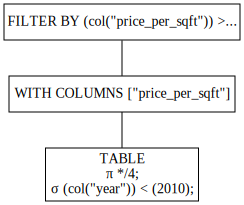

In [ ]:
lazy_query = (
    buildings_lazy
    .with_columns(
        (pl.col("price") / pl.col("sqft")).alias("price_per_sqft")
        )
    .filter(pl.col("price_per_sqft") > 100)
    .filter(pl.col("year") < 2010)
)

lazy_query.show_graph()

In [ ]:
(
    lazy_query
    .collect()
    .select(pl.col(["price_per_sqft", "year"]))
)

price_per_sqft,year
f64,i64
136.367182,2002
43890.679476,2000
172.155402,1996
155.244312,1998
1645.707997,2000
27619.783842,2003
684.047341,1996
200.292347,2007
108.396788,1999


In [ ]:
import requests
import pathlib

def download_file(file_url: str, local_file_path: pathlib.Path) -> None:
    """Download a file and save it with the specified file name."""
    response = requests.get(file_url)
    if response:
        local_file_path.write_bytes(response.content)
        print(f"File successfully downloaded and stored at: {local_file_path}")
    else:
        raise requests.exceptions.RequestException(
            f"Failed to download the file. Status code: {response.status_code}"
        )

In [ ]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
local_file_path = pathlib.Path("electric_cars.csv")

download_file(url, local_file_path)

File successfully downloaded and stored at: electric_cars.csv


In [ ]:
lazy_car_data = pl.scan_csv(local_file_path)
lazy_car_data

In [ ]:
lazy_car_data.schema

{'VIN (1-10)': Utf8,
 'County': Utf8,
 'City': Utf8,
 'State': Utf8,
 'Postal Code': Int64,
 'Model Year': Int64,
 'Make': Utf8,
 'Model': Utf8,
 'Electric Vehicle Type': Utf8,
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': Utf8,
 'Electric Range': Int64,
 'Base MSRP': Int64,
 'Legislative District': Int64,
 'DOL Vehicle ID': Int64,
 'Vehicle Location': Utf8,
 'Electric Utility': Utf8,
 '2020 Census Tract': Int64}

In [ ]:
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
        )
    .groupby(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.count().alias("Number of Cars"),
        )
    .filter(pl.col("Average Electric Range") > 0)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
    )

In [ ]:
lazy_car_query.collect()

State,Make,Average Electric Range,Oldest Model Year,Number of Cars
str,str,f64,i64,u32
"""WA""","""TESLA""",76.215075,2018,63550
"""WA""","""NISSAN""",84.965967,2018,5906
"""WA""","""CHEVROLET""",104.147281,2018,5812
"""WA""","""FORD""",0.128337,2018,3896
"""WA""","""KIA""",54.974002,2018,3808
"""WA""","""VOLKSWAGEN""",18.975013,2018,3722
"""WA""","""HYUNDAI""",20.598614,2018,2885
"""WA""","""AUDI""",79.543316,2019,1743
"""WA""","""BMW""",16.56254,2018,1559
